In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Project - PRODUCT REVIEW SUMMARIZATION**
#### **INTRODUCTION**:
Talking about the past decade, online shopping market has reached new heights. The e-commerce industry has grown at a rapid pace in this period and now days it’s an essential part of human lives all over the world. Online shopping now has a vast variety of products which are being purchased on a simple web application hassle free. The continuous improvement in the whole process by use of growing technology has brought a wide range of services to give the customer real time shopping experience. One of these services include customer reviews which are found to be very helpful in providing a full-fledged information of the product. Not only the images, prices, specifications but the reviews also are a part of a product catalogue now days. In this project we will focus on improving review readability for the customer using Natural Language Processing Techniques.

#### **PROBLEM STATEMENT**:
In this project we have to build a system which summarizes the customer reviews of a particular product into a bunch of keywords, so that when a customer goes to a product page, he/she doesn’t have to read long reviews. Instead he/she can make up his/her mind based on the product average rating and summarized keywords of the review. For this problem you may use any tools and techniques you like. The data consists of reviews and ratings information of the products which are being sold by the client via online website. The data description is as follows:

#### **DATA DESCRIPTION**:
You are given a file named “Cell_Phones_and_Accessories.json”. This file contains review information under following columns:

- IC – Item Code of the product, e.g. B016MF3P3K
- Reviewer_Name - Name of the reviewer
- Useful- Number of useful votes (upvotes) of the review
- Prod_meta- a dictionary of the product metadata. It contains only additional information about the product, if any available.
- Review- text of the review
- Rating- rating given to the product by the reviewer.
- Rev_summ- summary of the review
- Review_timestamp- time when the review has been posted (unix time format)
- Review_Date- Date when the review has been posted
- Prod_img- images that users post after they have received the product
- Rev_verify- Flag to represent whether the review has been verified or not. (True/False)

Now, since you have understood the features present in the dataset, you have to do a proper data cleaning for the same. You may remove all the rows where no review is present. You may choose any column(s) to perform this task. You may perform EDA, feature engineering if you are able to find any important new feature.

Once you have done data pre-processing for all the products, you have to predict the important words which summarize the reviews for each product and thus return those words. Number of words extracted for each topic depends on your understanding, you need to give a suitable reason for the number you choose. The summary keywords should not contain more than 30 words.

#### **OUTPUT**:
The output should be a dataframe containing following information:

- The Item Code: Must be unique. There should not be any duplicates.
- The maximum rating given by the users to the product.
- The average rating given by the users to the product.
- The minimum rating given by the user to the product.
- Review summary keywords extracted for each product.
- You may include any other relevant information you may feel like.

Your code should be well commented and also mention the brief reasoning behind all the steps and assumptions you have made in order to arrive to your solution. Save the resultant dataframe to json file. Also save the trained model used for this task.

#### **SUBMISSION**:
Submit your jupyter notebook or python file, resultant dataframe and saved model in a zipped file.

 **Load Data**

# **Importing Libraries**

In [2]:
#Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [3]:
#Read Data
import pandas as pd
df=pd.read_json('/content/drive/My Drive/Product review/Cell_Phones_and_Accessories.json')
df.head(2)

Rating  Rev_verify Review_Date  ... Review_timestamp Useful Prod_img
0       5        True  09 1, 2015  ...       1441065600   None     None
1       5        True  01 9, 2016  ...       1452297600   None     None

[2 rows x 11 columns]

In [4]:
df.tail(3)

Rating  Rev_verify  Review_Date  ... Review_timestamp Useful Prod_img
760447       4        True  07 23, 2015  ...       1437609600   None     None
760448       5        True  12 14, 2015  ...       1450051200   None     None
760449       5        True  02 24, 2016  ...       1456272000   None     None

[3 rows x 11 columns]

#### ***Data Analysis***

In [5]:
# Shape(rows,columns) 
df.shape

(760450, 11)

In [6]:
# Datatypes
df.dtypes

Rating               int64
Rev_verify            bool
Review_Date         object
IC                  object
Prod_meta           object
Reviewer_Name       object
Review              object
Rev_summ            object
Review_timestamp     int64
Useful              object
Prod_img            object
dtype: object

In [7]:
# Info
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 760450 entries, 0 to 760449
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Rating            760450 non-null  int64 
 1   Rev_verify        760450 non-null  bool  
 2   Review_Date       760450 non-null  object
 3   IC                760450 non-null  object
 4   Prod_meta         407826 non-null  object
 5   Reviewer_Name     760359 non-null  object
 6   Review            759920 non-null  object
 7   Rev_summ          760095 non-null  object
 8   Review_timestamp  760450 non-null  int64 
 9   Useful            62200 non-null   object
 10  Prod_img          18194 non-null   object
dtypes: bool(1), int64(2), object(8)
memory usage: 64.5+ MB


**Missing values**

In [8]:
# Missing Values
df.isna().sum()

Rating                   0
Rev_verify               0
Review_Date              0
IC                       0
Prod_meta           352624
Reviewer_Name           91
Review                 530
Rev_summ               355
Review_timestamp         0
Useful              698250
Prod_img            742256
dtype: int64

#### **Observations:**
- Many missing values
- Three datatypes 1)Object 2)Bool & 3)int64
- More than 760k rows and 11-columns in the dataset
 

**Exploratory Data Analysis**

In [9]:
# Features
df.columns

Index(['Rating', 'Rev_verify', 'Review_Date', 'IC', 'Prod_meta',
       'Reviewer_Name', 'Review', 'Rev_summ', 'Review_timestamp', 'Useful',
       'Prod_img'],
      dtype='object')

In [10]:
# Rating with counts 
print('Rating:',df['Rating'].unique())
print(df['Rating'].value_counts())

Rating: [5 3 4 1 2]
5    476637
4    123961
3     66391
1     54993
2     38468
Name: Rating, dtype: int64


In [11]:
# Rev_Verify 
print('Rev_verify:',df['Rev_verify'].unique())
print()
print(df['Rev_verify'].value_counts())

Rev_verify: [ True False]

True     665454
False     94996
Name: Rev_verify, dtype: int64


In [12]:
#Most popular purchased product based on IC
print(df['IC'].unique())
print(df['IC'].value_counts())

['B009XD5TPQ' 'B016MF3P3K' 'B008DC8N5G' ... 'B01739B1XA' 'B00GI8RRZE'
 'B0058LE8YK']
B00VH88CJ0    1127
B005NF5NTK    1106
B019PV2I3G    1033
B00X5RV14Y    1018
B00P7N0320    1011
              ... 
B0027V75TY       1
B00D25ZUMS       1
B003TMBK7I       1
B001658AQ4       1
B00CGPN1BW       1
Name: IC, Length: 48134, dtype: int64


In [13]:
#Customer/Review_Name
df['Reviewer_Name'].head()

0    Sunny  Zoeller
1     Denise Lesley
2              Emir
3             Alyse
4           TechGuy
Name: Reviewer_Name, dtype: object

In [14]:
# Review text
df['Review']

0         Bought it for my husband. He's very happy with it
1         Great screen protector.  Doesn't even seem as ...
2         Saved me lots of money! it's not gorilla glass...
3         The material and fit is very nice, but the col...
4         This last me about 3 days till i have to charg...
                                ...                        
760445                                            Very good
760446    My name is Cynthia Beard and I believe that th...
760447    This iphone case is very durable and long last...
760448                                                great
760449    So so, it did not look like the picture advert...
Name: Review, Length: 760450, dtype: object

In [15]:
# Summary/Title
df['Rev_summ'].head(10)

0                                 He's very happy with
1                                           Five Stars
2                As long as you know how to put it on!
3                                    Good case overall
4                                      Awesome Battery
5                                           Five Stars
6                Simple and good quality iPhone 6 case
7                                             Perfect!
8    Make sure your Items work before you miss the ...
9    This clever design combines a battery pack int...
Name: Rev_summ, dtype: object

In [16]:
# Upvotes count
print('Upvotes: Counts \n',df['Useful'].value_counts())

Upvotes: Counts 
 2      22532
3      10770
4       6072
5       4003
6       2891
       ...  
201        1
391        1
272        1
494        1
303        1
Name: Useful, Length: 386, dtype: int64


#### **Descriptive Statistics & Visualization**

In [17]:
#Statistical Summary
df.describe()

Rating  Review_timestamp
count  760450.000000      7.604500e+05
mean        4.221357      1.440417e+09
std         1.232186      4.563251e+07
min         1.000000      1.035331e+09
25%         4.000000      1.416355e+09
50%         5.000000      1.444349e+09
75%         5.000000      1.470442e+09
max         5.000000      1.538438e+09

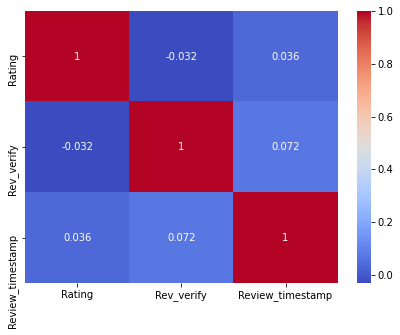

In [18]:
# Correlation
plt.figure(figsize=(7,5))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')

<Figure size 504x360 with 0 Axes>

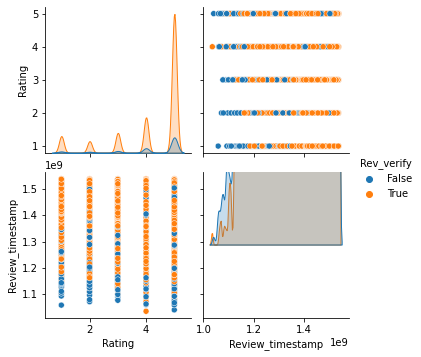

In [19]:
# Check Pairplot
plt.figure(figsize=(7,5))
sns.pairplot(df,hue='Rev_verify')

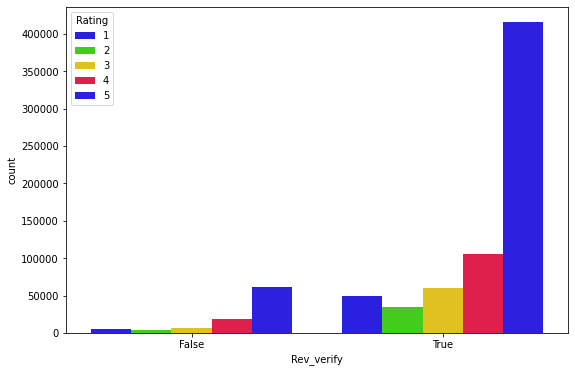

In [20]:
#Check if rating depends on Rev_verify count
plt.figure(figsize=(9,6))
sns.countplot(x='Rev_verify',hue='Rating',data=df,palette='prism')

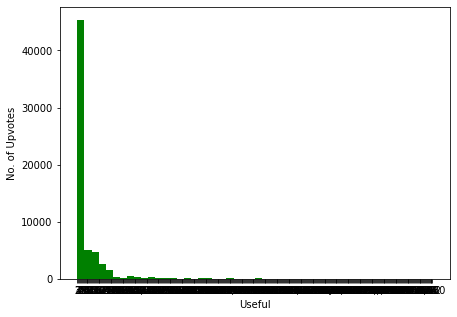

In [21]:
plt.figure(figsize=(7,5))
plt.xlabel('Useful')
plt.ylabel('No. of Upvotes')
df['Useful'].hist(bins=50,color='green',grid=False)

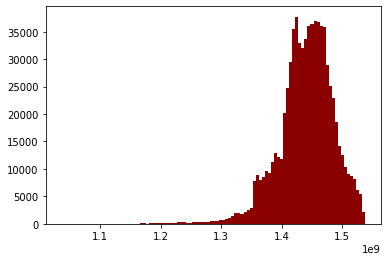

In [22]:
df['Review_timestamp'].hist(bins=100,color='darkred',grid=False)

#### **Visual Infernceses:**
- From statistical summary most of ratings comprises of 4 & 5star.
- Rating & Rev_verify are negatively correlated
- Count of verified review is more
- Upvotes is right-skewed which is very likely & understandable.
- Time stamp is normally distributed


In [23]:
# There are many duplicate reviews (exact same comments in review)
# but I am not going to clean the data yet, so I just use the data as it is, to go through the learning process.
df['Review'].value_counts()[10:50]

very good            1145
nice                 1093
Great product        1027
Perfect               972
excelente             954
Works great           939
Ok                    927
works great           801
Very good             774
Excelente             697
Good product          692
perfect               680
great product         673
Thanks                582
Great!                565
Awesome               558
Works great!          549
good product          546
Love it!              526
Great case            484
I love it             413
thanks                398
Excelent              396
excelent              385
Works great.          373
Thank you             369
Great product!        360
GOOD                  349
A+                    339
OK                    334
Great product.        323
excellent product     319
Nice case             310
Very nice             306
Excellent product     287
EXCELLENT             280
Perfect!              271
thank you             265
Works well  

#### **Distribution of Ratings**

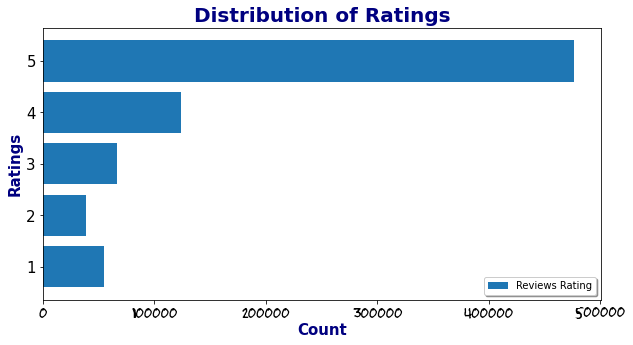

In [24]:
# Plot ratings frequency
plt.figure(figsize = [10,5])   # [width, height]

x = list( df['Rating'].value_counts().index )
y = list( df['Rating'].value_counts() )
plt.barh(x, y)

ticks_x = np.linspace(0, 500000, 6)   # (start, end, number of ticks)
plt.xticks(ticks_x, fontsize=15, family='fantasy', color='black')
plt.yticks( size=15 )

plt.title('Distribution of Ratings', fontsize=20, weight='bold', color='navy', loc='center')
plt.xlabel('Count', fontsize=15, weight='bold', color='navy')
plt.ylabel('Ratings', fontsize=15, weight='bold', color='navy')
plt.legend(['Reviews Rating'], shadow=True, loc=4)
# loc=1 topright, loc=2 topleft, loc=3 bottomleft, loc=4 bottom right, loc=9 topmiddle

# plt.grid()   # add grid lines

# **Words Use for review**

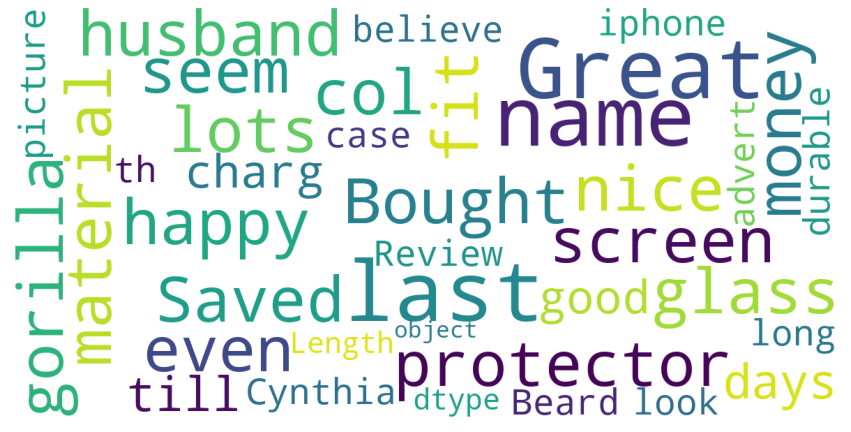

In [25]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=300,
        max_font_size=40, 
        scale=3,
        random_state=1    ).generate(str(data))

    fig = plt.figure(1, figsize=(15, 15))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()

show_wordcloud(df['Review'])

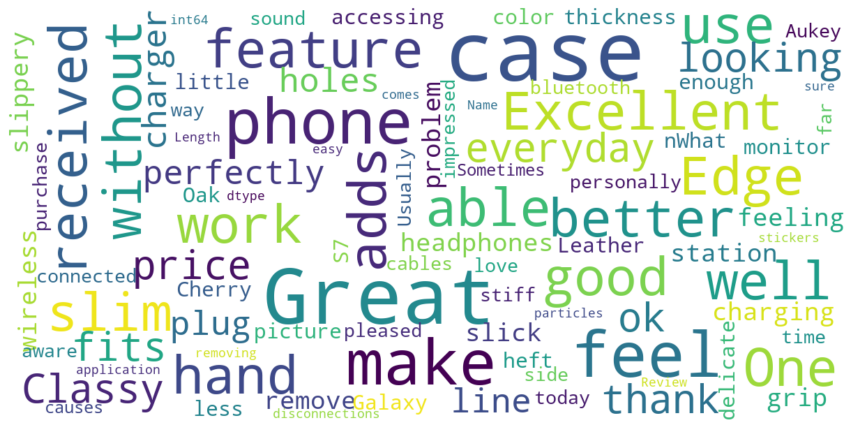

In [26]:
# alternate code, seems to yield different results
wordcloud = WordCloud(background_color='white', stopwords=stopwords, max_words=300, max_font_size=40, scale=3,
        random_state=1).generate(str(df['Review'].value_counts()))
plt.figure(figsize=(15, 15))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

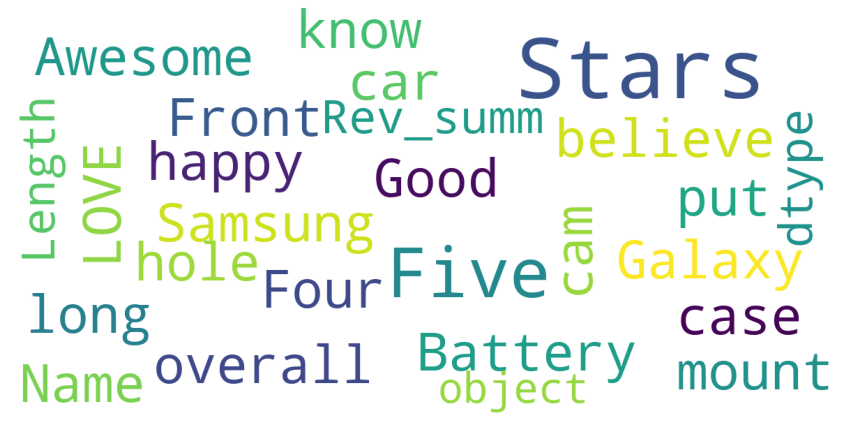

In [27]:
# Display Rev_summary/Title
show_wordcloud(df['Rev_summ'])

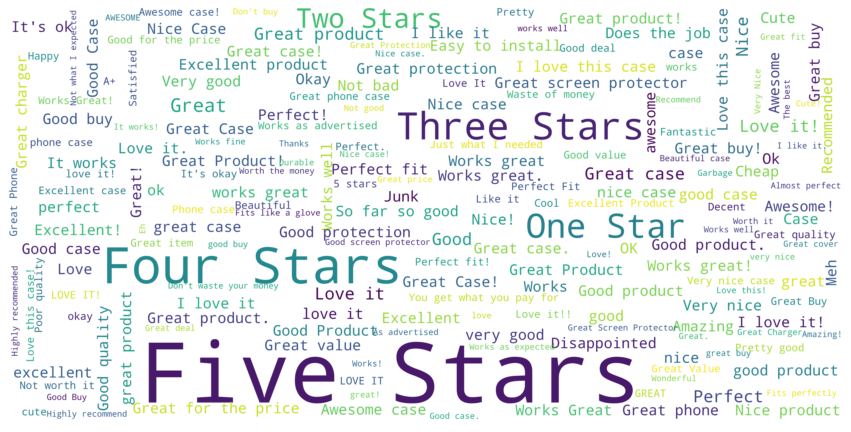

In [28]:
 # alternate code, seems to yield different results
wordcloud = WordCloud(background_color='white', stopwords=stopwords, max_words=400, max_font_size=40, scale=30,
        random_state=1).generate_from_frequencies((df['Rev_summ'].value_counts()  ))
plt.figure(figsize=(15, 15))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

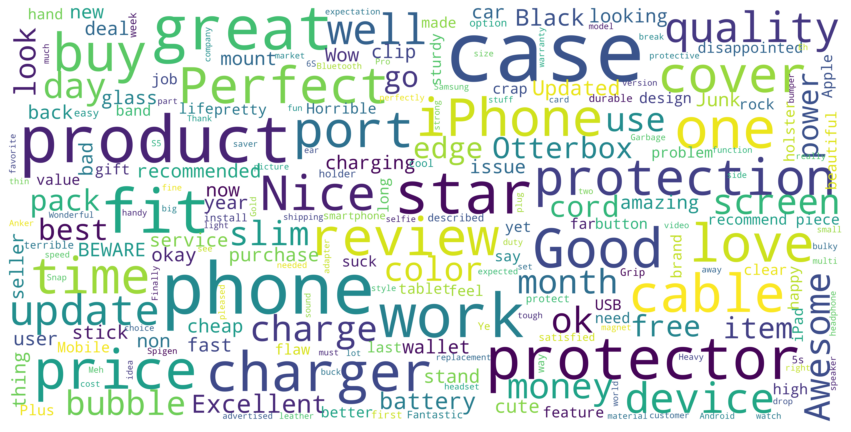

In [29]:
# try to tokenize to individual word (uni-gram) - Rev_summ
split_title = []
listCounts = []
split_title = [x.split(" ") for x in df['Rev_summ'].astype(str)]
big_list = []
for x in split_title:
    big_list.extend(x)

listCounts = pd.Series(big_list).value_counts()

wordcloud = WordCloud(background_color='white', max_words=400, max_font_size=40, scale=30,
        random_state=1).generate((listCounts[listCounts > 2]).to_string())
plt.figure(figsize=(15, 15))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [30]:
len(big_list)  # reviews.title

3359539

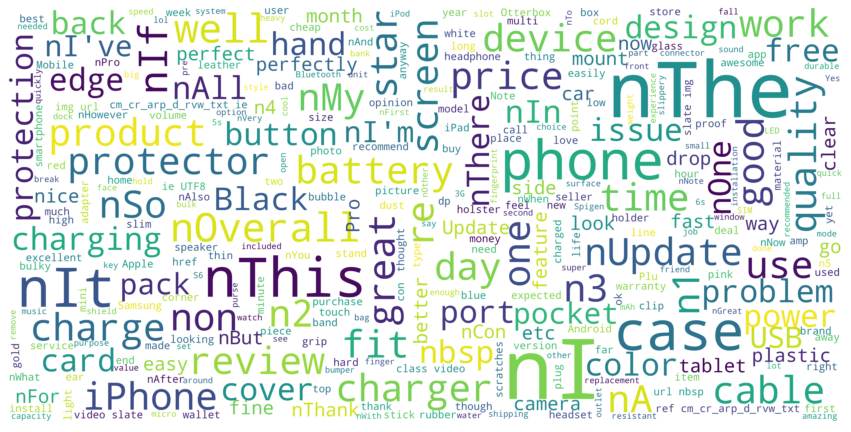

In [31]:
# try to tokenize to individual word (uni-gram) - reviews.text
split_title = []
listCounts = []
split_title = [x.split(" ") for x in df['Review'].astype(str)]
big_list = []
for x in split_title:
    big_list.extend(x)

listCounts = pd.Series(big_list).value_counts()

wordcloud = WordCloud(background_color='white', max_words=400, max_font_size=40, scale=30,
        random_state=1).generate((listCounts[listCounts > 2]).to_string())
plt.figure(figsize=(15, 15))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [32]:

len(big_list)   # reviews.text

38575210

# Do reviews come from shoppers who did purchase the product

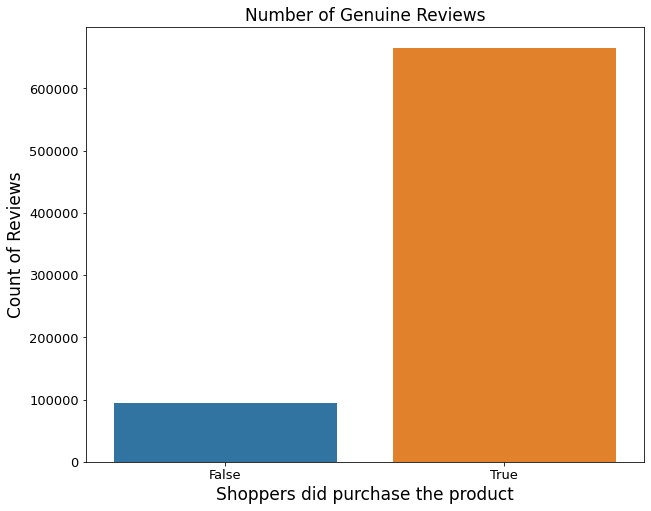

In [33]:
# Lets check number Genuine Reviews
plt.figure(figsize=(10,8))
ax = sns.countplot(df['Rev_verify'])
ax.set_xlabel(xlabel="Shoppers did purchase the product", fontsize=17)
ax.set_ylabel(ylabel='Count of Reviews', fontsize=17)
ax.axes.set_title('Number of Genuine Reviews', fontsize=17)
ax.tick_params(labelsize=13)

In [34]:
df['Rev_verify'].value_counts()
# Verify review constitute of 87.5% of the total review
665454/760450

0.8750792294036426

**Label Data**

In [35]:

df['Review'] = df['Review'].replace(np.nan, '', regex=True)
df['Rev_summ'] = df['Rev_summ'].replace(np.nan, '', regex=True)
print(df['Review'].isnull().sum())
print(df['Rev_summ'].isnull().sum())

0
0


In [36]:
productreview = df.copy()
data = productreview[['IC','Review','Rev_summ']]

In [37]:
data.head(5)

IC  ...                               Rev_summ
0  B009XD5TPQ  ...                   He's very happy with
1  B016MF3P3K  ...                             Five Stars
2  B008DC8N5G  ...  As long as you know how to put it on!
3  B0089CH3TM  ...                      Good case overall
4  B00AKZWGAC  ...                        Awesome Battery

[5 rows x 3 columns]

In [38]:
# New shape
data.shape

(760450, 3)

In [39]:
# Group & Aggregate
data = data.groupby('IC').agg({'Review':'first',
                               'Rev_summ': ' '.join}).reset_index()

In [40]:
data.shape

(48134, 3)

In [41]:
data.head(3)

IC  ...                                           Rev_summ
0  7508492919  ...  I love it I didn't get the same case that's sh...
1  7532385086  ...  A waste of money! htc evo cover better than ex...
2  7887421268  ...  Five Stars good deal Five Stars Loved it at fi...

[3 rows x 3 columns]

In [42]:
data['Review'][50]

'I still have AT&T. I do get dropped calls, but of all companies, I guess this is the best. NEVER GET VERIZON!!'

In [43]:
data['Rev_summ'][50]

'Was Cingular` Good service  At&T worked Worth the money Five Stars Cingular 2 Year Contract So far So good Five Stars Purchased a while back could be cheaper! Five Stars'

In [44]:
# Combining Review & Rev_summ 
final_data = data.copy()
final_data['combined_Rev'] =final_data[['Review', 'Rev_summ']].apply(lambda x: ' '.join(x), axis=1)

In [45]:
final_data.head(4)

IC  ...                                       combined_Rev
0  7508492919  ...  It is such a good case for a low price. I have...
1  7532385086  ...  I was very excited when I first got this case....
2  7887421268  ...  Good item Five Stars good deal Five Stars Love...
3  8199900164  ...  thank you. Five Stars I item didn't work Five ...

[4 rows x 4 columns]

In [46]:
final_data['Review'][10]

"it does what it promises. normally I'd start charging when it's 50% left, and it does the job. it won't give 100% if the phone dies, maybe 70% charge. it doesn't have much grip, although it's not as slippery as the phone. and it adds extra length to the phone. not too much bulk."

In [47]:
final_data['Rev_summ'][10]

'decent case One Star Takes forever to recharge the case. Plug it in ... Surprisingly slimmer and lighter than expected. Love this! Exactly As Described Thanks Guys Great feel for a case however as a charging case ... One Star Delivers extra power when needed, but it is is ... One Star Its iight i guess.'

In [48]:
final_data['combined_Rev'][10]

"it does what it promises. normally I'd start charging when it's 50% left, and it does the job. it won't give 100% if the phone dies, maybe 70% charge. it doesn't have much grip, although it's not as slippery as the phone. and it adds extra length to the phone. not too much bulk. decent case One Star Takes forever to recharge the case. Plug it in ... Surprisingly slimmer and lighter than expected. Love this! Exactly As Described Thanks Guys Great feel for a case however as a charging case ... One Star Delivers extra power when needed, but it is is ... One Star Its iight i guess."

**Pre-processing**

In [49]:
import nltk
nltk.download('wordnet')
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from nltk.stem import WordNetLemmatizer, SnowballStemmer,StemmerI


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [50]:
stemmer = SnowballStemmer("english")
def lemmatize_stemming(text):
    return stemmer.stem(WordNetLemmatizer().lemmatize(text,pos='v'))

#Tokenize and Lemmatize
def preprocess(text):
    result=[]
    for token in gensim.utils.simple_preprocess(text):
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token)>3:
            result.append(lemmatize_stemming(token))
            
    return result

In [51]:
# Pre-processing whole docment
processed_docs = []
for doc in final_data['combined_Rev']:
    processed_docs.append(preprocess(doc))

In [52]:
processed_docs

[['good',
  'case',
  'price',
  'right',
  'problem',
  'lose',
  'stone',
  'purchas',
  'rough',
  'recommend',
  'love',
  'case',
  'show',
  'pretti',
  'cute',
  'cute',
  'bing',
  'bling',
  'love',
  'cute',
  'tightt',
  'star',
  'crystal',
  'case',
  'cute',
  'great',
  'gift',
  'love',
  'invis',
  'case',
  'ador',
  'gonna',
  'order',
  'rest',
  'love',
  'case',
  'beauti',
  'sara',
  'stop',
  'case',
  'bling',
  'cute',
  'bling',
  'bling',
  'iphon',
  'bling',
  'worth',
  'great',
  'price',
  'cute',
  'spark',
  'good',
  'love',
  'phone',
  'cover',
  'pretti',
  'cute',
  'amaz',
  'great',
  'cheap',
  'plastic',
  'okay',
  'phone',
  'case',
  'love',
  'great',
  'case'],
 ['excit',
  'case',
  'love',
  'color',
  'feel',
  'start',
  'notic',
  'stuff',
  'hand',
  'realiz',
  'rubber',
  'peel',
  'right',
  'phone',
  'normal',
  'say',
  'go',
  'wast',
  'money',
  'cover',
  'better',
  'expect',
  'expect',
  'star',
  'star',
  'love',
  

In [53]:
len(processed_docs)

48134

In [54]:
print(processed_docs[:10])

[['good', 'case', 'price', 'right', 'problem', 'lose', 'stone', 'purchas', 'rough', 'recommend', 'love', 'case', 'show', 'pretti', 'cute', 'cute', 'bing', 'bling', 'love', 'cute', 'tightt', 'star', 'crystal', 'case', 'cute', 'great', 'gift', 'love', 'invis', 'case', 'ador', 'gonna', 'order', 'rest', 'love', 'case', 'beauti', 'sara', 'stop', 'case', 'bling', 'cute', 'bling', 'bling', 'iphon', 'bling', 'worth', 'great', 'price', 'cute', 'spark', 'good', 'love', 'phone', 'cover', 'pretti', 'cute', 'amaz', 'great', 'cheap', 'plastic', 'okay', 'phone', 'case', 'love', 'great', 'case'], ['excit', 'case', 'love', 'color', 'feel', 'start', 'notic', 'stuff', 'hand', 'realiz', 'rubber', 'peel', 'right', 'phone', 'normal', 'say', 'go', 'wast', 'money', 'cover', 'better', 'expect', 'expect', 'star', 'star', 'love', 'product'], ['good', 'item', 'star', 'good', 'deal', 'star', 'love', 'great', 'plastic', 'sued', 'star', 'case', 'exact', 'describ', 'star', 'poor', 'quailti', 'wrong', 'cute', 'simpl',

**Feature Extraction**

In [55]:
# Making a dictionary cotaining words
dictionary = gensim.corpora.Dictionary(processed_docs)

In [56]:
print(dictionary)

Dictionary(25210 unique tokens: ['ador', 'amaz', 'beauti', 'bing', 'bling']...)


In [57]:
# First 30-items
count=0
for k,v in dictionary.iteritems():
    print (k, v)
    count +=1
    if count >30:
        break

0 ador
1 amaz
2 beauti
3 bing
4 bling
5 case
6 cheap
7 cover
8 crystal
9 cute
10 gift
11 gonna
12 good
13 great
14 invis
15 iphon
16 lose
17 love
18 okay
19 order
20 phone
21 plastic
22 pretti
23 price
24 problem
25 purchas
26 recommend
27 rest
28 right
29 rough
30 sara


In [58]:
# Remove rare & repeatitive
dictionary.filter_extremes()

In [59]:
print(dictionary)

Dictionary(6672 unique tokens: ['ador', 'amaz', 'beauti', 'bing', 'bling']...)


In [60]:
# Applying BOW 
bow_corpus = [dictionary.doc2bow(doc) for doc in processed_docs]
print('Bag-of-words of document:',bow_corpus[5])

Bag-of-words of document: [(19, 2), (22, 1), (24, 1), (29, 1), (34, 1), (61, 6), (62, 4), (63, 5), (66, 1), (71, 1), (75, 1), (76, 1), (77, 1), (78, 1), (79, 1), (80, 1), (81, 1), (82, 1), (83, 1), (84, 1), (85, 1), (86, 1)]


In [61]:
# Preview
document_num = 0
bow_doc_x = bow_corpus[document_num]

for i in range(len(bow_doc_x)):
  print("word {} (\"{}\") appears {} time.".format(bow_doc_x[i][1],dictionary[bow_doc_x[i][1]],bow_doc_x[i][1]))

word 1 ("amaz") appears 1 time.
word 1 ("amaz") appears 1 time.
word 1 ("amaz") appears 1 time.
word 1 ("amaz") appears 1 time.
word 5 ("cheap") appears 5 time.
word 1 ("amaz") appears 1 time.
word 1 ("amaz") appears 1 time.
word 1 ("amaz") appears 1 time.
word 7 ("crystal") appears 7 time.
word 1 ("amaz") appears 1 time.
word 1 ("amaz") appears 1 time.
word 1 ("amaz") appears 1 time.
word 1 ("amaz") appears 1 time.
word 1 ("amaz") appears 1 time.
word 6 ("cover") appears 6 time.
word 1 ("amaz") appears 1 time.
word 1 ("amaz") appears 1 time.
word 1 ("amaz") appears 1 time.
word 2 ("beauti") appears 2 time.
word 2 ("beauti") appears 2 time.
word 1 ("amaz") appears 1 time.
word 1 ("amaz") appears 1 time.
word 1 ("amaz") appears 1 time.
word 1 ("amaz") appears 1 time.
word 1 ("amaz") appears 1 time.
word 1 ("amaz") appears 1 time.
word 1 ("amaz") appears 1 time.
word 1 ("amaz") appears 1 time.
word 1 ("amaz") appears 1 time.
word 1 ("amaz") appears 1 time.
word 1 ("amaz") appears 1 time.

In [62]:
from gensim import corpora,models
from pprint import pprint

**Creating TF-IDF Models**

In [63]:
# Creating a TF-IDF model
tfidf = models.TfidfModel(corpus = bow_corpus)


In [64]:
tfidf_corpus = tfidf[bow_corpus]
print("1st TD-IDF: ", tfidf_corpus[1])

1st TD-IDF:  [(6, 0.12721761533342213), (14, 0.12450877185332303), (24, 0.17552628780755491), (31, 0.1259702446088735), (32, 0.14108334619770058), (33, 0.34085455197506126), (34, 0.30065149988386475), (35, 0.13543623356425508), (36, 0.16943195113597165), (37, 0.1907542549564373), (38, 0.14787704021190515), (39, 0.269409250573251), (40, 0.26131466499561706), (41, 0.28968608555483816), (42, 0.0655529399303793), (43, 0.32738237977638684), (44, 0.21416061469631587), (45, 0.20541953856484735), (46, 0.22471220314132456), (47, 0.2675416681123928), (48, 0.2084596550881552)]


In [65]:
count=0
for doc in tfidf_corpus:
  pprint(doc)
  count += 1
  if count ==2:
    break

[(0, 0.12857693135382176),
 (1, 0.07088904400818548),
 (2, 0.07270000919918872),
 (3, 0.2263143839580936),
 (4, 0.6380464879110068),
 (5, 0.060903690895697596),
 (6, 0.050169938855455946),
 (7, 0.12105864203693423),
 (8, 0.49627756753866853),
 (9, 0.08820290919186652),
 (10, 0.15883065190689077),
 (11, 0.14657483933458415),
 (12, 0.04841519249890269),
 (13, 0.10137137879666572),
 (14, 0.147305012465708),
 (15, 0.0775735862554975),
 (16, 0.07012493718109294),
 (17, 0.06920653107503927),
 (18, 0.10457377484719263),
 (19, 0.06983204044565798),
 (20, 0.06851636490289492),
 (21, 0.05682679653951866),
 (22, 0.04749072638098378),
 (23, 0.1281857057842942),
 (24, 0.06922109885294067),
 (25, 0.12773632883684785),
 (26, 0.10047542276581711),
 (27, 0.16367179739783014),
 (28, 0.1704902553614631),
 (29, 0.09929566125618666),
 (30, 0.06153747314143853)]
[(6, 0.12721761533342213),
 (14, 0.12450877185332303),
 (24, 0.17552628780755491),
 (31, 0.1259702446088735),
 (32, 0.14108334619770058),
 (33, 0.3

**Modelling**

In [66]:
lda_model = gensim.models.LdaMulticore(tfidf_corpus,num_topics = 8,id2word =dictionary,passes=10,workers=2)

In [67]:
for idx,topic in lda_model.print_topics(num_words=30):
  print("Topic: {} \nWords: {}".format(idx,topic))
  print("\n")

Topic: 0 
Words: 0.033*"len" + 0.021*"lens" + 0.020*"droid" + 0.018*"excelent" + 0.015*"turbo" + 0.008*"ringk" + 0.008*"macro" + 0.007*"maxx" + 0.007*"camera" + 0.007*"wide" + 0.007*"hit" + 0.007*"motorola" + 0.007*"phoenix" + 0.007*"mega" + 0.006*"caseolog" + 0.006*"razr" + 0.006*"blurri" + 0.005*"producto" + 0.005*"delic" + 0.005*"bad" + 0.005*"anim" + 0.004*"zoom" + 0.004*"handlebar" + 0.004*"fish" + 0.004*"oop" + 0.004*"photo" + 0.004*"rocker" + 0.004*"beetl" + 0.004*"novelti" + 0.004*"circl"


Topic: 1 
Words: 0.022*"love" + 0.017*"protect" + 0.016*"nice" + 0.014*"cute" + 0.014*"look" + 0.014*"color" + 0.012*"fit" + 0.010*"perfect" + 0.010*"like" + 0.010*"pretti" + 0.009*"beauti" + 0.009*"price" + 0.008*"iphon" + 0.008*"cover" + 0.008*"qualiti" + 0.007*"durabl" + 0.007*"sturdi" + 0.006*"slim" + 0.006*"awesom" + 0.006*"feel" + 0.006*"product" + 0.006*"wallet" + 0.006*"cheap" + 0.006*"drop" + 0.005*"design" + 0.005*"bulki" + 0.005*"buy" + 0.005*"recommend" + 0.005*"best" + 0.005*"da

**Model Perplexity & Coherence Score**

In [68]:
from gensim.models import  CoherenceModel

## Perplexity: Lower the better
print('\nPerplexity: ',lda_model.log_perplexity(tfidf_corpus)) # Measure how good the model is lower the better

#  Coherence score
coherence_model_lda = CoherenceModel(model=lda_model,texts=processed_docs,dictionary=dictionary,coherence='c_v')
coherence_lda= coherence_model_lda.get_coherence()
print('\nCoherence Score: ',coherence_lda)


Perplexity:  -8.083176940695841

Coherence Score:  0.4753888403263545


**Saving the Model**

In [69]:
lda_model.save('lda_multi.model')

In [70]:
trained_lda_multi = models.LdaMulticore.load('lda_multi.model')

In [71]:
trained_lda_multi.show_topics(num_topics=15,num_words=30)

[(0,
  '0.033*"len" + 0.021*"lens" + 0.020*"droid" + 0.018*"excelent" + 0.015*"turbo" + 0.008*"ringk" + 0.008*"macro" + 0.007*"maxx" + 0.007*"camera" + 0.007*"wide" + 0.007*"hit" + 0.007*"motorola" + 0.007*"phoenix" + 0.007*"mega" + 0.006*"caseolog" + 0.006*"razr" + 0.006*"blurri" + 0.005*"producto" + 0.005*"delic" + 0.005*"bad" + 0.005*"anim" + 0.004*"zoom" + 0.004*"handlebar" + 0.004*"fish" + 0.004*"oop" + 0.004*"photo" + 0.004*"rocker" + 0.004*"beetl" + 0.004*"novelti" + 0.004*"circl"'),
 (1,
  '0.022*"love" + 0.017*"protect" + 0.016*"nice" + 0.014*"cute" + 0.014*"look" + 0.014*"color" + 0.012*"fit" + 0.010*"perfect" + 0.010*"like" + 0.010*"pretti" + 0.009*"beauti" + 0.009*"price" + 0.008*"iphon" + 0.008*"cover" + 0.008*"qualiti" + 0.007*"durabl" + 0.007*"sturdi" + 0.006*"slim" + 0.006*"awesom" + 0.006*"feel" + 0.006*"product" + 0.006*"wallet" + 0.006*"cheap" + 0.006*"drop" + 0.005*"design" + 0.005*"bulki" + 0.005*"buy" + 0.005*"recommend" + 0.005*"best" + 0.005*"daughter"'),
 (2,
 

In [72]:
trained_lda_multi.print_topic(0,topn=10)

'0.033*"len" + 0.021*"lens" + 0.020*"droid" + 0.018*"excelent" + 0.015*"turbo" + 0.008*"ringk" + 0.008*"macro" + 0.007*"maxx" + 0.007*"camera" + 0.007*"wide"'

In [73]:

#Finding the topic in each sentence
def format_topics_sentences(ldamodel=trained_lda_multi, corpus=tfidf_corpus, texts=processed_docs):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row in enumerate(ldamodel[corpus]):
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(ldamodel=trained_lda_multi, corpus=tfidf_corpus, texts=processed_docs)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Review_Keywords', 'Original review']

# Show
df_dominant_topic.head(20)

Document_No  ...                                    Original review
0             0  ...  [good, case, price, right, problem, lose, ston...
1             1  ...  [excit, case, love, color, feel, start, notic,...
2             2  ...  [good, item, star, good, deal, star, love, gre...
3             3  ...                    [thank, star, item, work, star]
4             4  ...  [great, charger, pretti, good, year, fit, phon...
5             5  ...  [fit, short, defin, recommend, price, right, c...
6             6  ...  [perfect, note, backup, charger, chage, samsun...
7             7  ...  [charger, specif, long, term, usag, plug, remo...
8             8  ...  [nice, case, print, start, fade, peel, use, st...
9             9  ...  [final, actual, work, samsung, note, charg, fa...
10           10  ...  [promis, normal, start, charg, leav, phone, di...
11           11  ...  [product, charg, describ, plastic, qualiti, su...
12           12  ...  [charg, phone, cover, time, phone, fall, easil...
13           13  ...  [buy, children, phone, love, dead, batteri, ex...
14           14  ...  [buy, fantast, discharg, hour, activ, mean, la...
15           15  ...  [great, product, fast, deliveri, love, extend,...
16           16  ...  [graet, charg, quick, graet, charg, quick, sta...
17           17  ...  [want, charger, chanc, chanc, plug, phone, cha...
18           18  ...  [extern, batteri, fulli, charg, shut, intermit...
19           19  ...  [monthish, charg, get, shorter, shorter, tri, ...

[20 rows x 5 columns]

In [74]:
final_data.head(7)

IC  ...                                       combined_Rev
0  7508492919  ...  It is such a good case for a low price. I have...
1  7532385086  ...  I was very excited when I first got this case....
2  7887421268  ...  Good item Five Stars good deal Five Stars Love...
3  8199900164  ...  thank you. Five Stars I item didn't work Five ...
4  8288853439  ...  Great ! So far.\nI had this charger before and...
5  8288862993  ...  OEM is the way to go, fits the way it should a...
6  828886922X  ...  Perfect to use on my note 4. I got this as an ...

[7 rows x 4 columns]

In [75]:
df_dominant_topic['Original review'][4]

['great',
 'charger',
 'pretti',
 'good',
 'year',
 'fit',
 'phone',
 'iphon',
 'galaxi',
 'phone',
 'right',
 'portal',
 'judi',
 'charg',
 'slower',
 'charger',
 'go',
 'tend',
 'loos',
 'firm',
 'short',
 'good',
 'galaxi',
 'charger',
 'liar',
 'star',
 'great',
 'poor',
 'charger',
 'star',
 'work',
 'great',
 'work',
 'fine',
 'great',
 'rapid',
 'charger',
 'star']

In [76]:
df_dominant_topic['Review_Keywords'][5]

'charg, charger, cabl, work, batteri, mount, power, cord, product, devic'

In [77]:
result_df = pd.concat([final_data,df_dominant_topic],axis=1,join='inner')

In [78]:
result_df.head(3)

IC  ...                                    Original review
0  7508492919  ...  [good, case, price, right, problem, lose, ston...
1  7532385086  ...  [excit, case, love, color, feel, start, notic,...
2  7887421268  ...  [good, item, star, good, deal, star, love, gre...

[3 rows x 9 columns]

In [79]:
result_df = result_df[['IC','combined_Rev','Dominant_Topic','Topic_Perc_Contrib','Original review','Review_Keywords']]
result_df.head(4)

IC  ...                                    Review_Keywords
0  7508492919  ...  love, protect, nice, cute, look, color, fit, p...
1  7532385086  ...  love, protect, nice, cute, look, color, fit, p...
2  7887421268  ...  love, protect, nice, cute, look, color, fit, p...
3  8199900164  ...  work, excel, product, batteri, replac, perfect...

[4 rows x 6 columns]

In [80]:
# Group top5 sentences under each topic
sent_topics_sorteddf_lda = pd.DataFrame()
sent_topics_outdf_grpd = df_topic_sents_keywords.groupby('Dominant_Topic')

for i, grp in sent_topics_outdf_grpd:
  sent_topics_sorteddf_lda = pd.concat([sent_topics_sorteddf_lda,grp.sort_values(['Perc_Contribution'],ascending=[0]).head(1)],axis=0)


#Reset index
sent_topics_sorteddf_lda.reset_index(drop=True,inplace=True)

# Format
sent_topics_sorteddf_lda.columns = ['Topic_Num','Topic_Perc_Contrib','Review_Keywords','Original review']

# Show
sent_topics_sorteddf_lda.head(5)

Topic_Num  ...                                    Original review
0        0.0  ...      [beauti, star, star, droid, razr, maxx, ladi]
1        1.0  ...  [order, wife, gift, look, rat, give, tell, lik...
2        2.0  ...  [headset, uncomfort, cancel, background, nois,...
3        3.0  ...  [love, magnet, case, magnet, strong, star, gre...
4        4.0  ...  [inexpens, case, exact, look, want, bulk, ipho...

[5 rows x 4 columns]

In [81]:
sent_topics_sorteddf_lda.to_csv('lda_multi_submssion.csv',index=False)

**Converting Output CSV file to JSON file**

In [82]:
import io
import pandas as pd
import json

In [83]:
ss =pd.read_csv('lda_multi_submssion.csv')
dc = ss.to_dict(orient='index')
with io.open('output.json','w',encoding="utf-8") as f2:
  f2.write(json.dumps(dc,indent=4))
  f2.close()